In [26]:
from pathlib import Path
import pickle

# Assuming src is in the python path or adjust sys.path if needed
import sys
sys.path.append('../')

# Find parent directory
root = Path().resolve().parent

# Collect pickle files
pickle_files = list(root.glob('*.pkl')) + list(root.glob('*.pickle'))
if not pickle_files:
    raise FileNotFoundError(f"No pickle files found in {root}")

# Identify the most recently modified one
latest_file = max(pickle_files, key=lambda p: p.stat().st_mtime)
print(f"Loading the most recent file: {latest_file}")

# Load it as episodes
with open(latest_file, 'rb') as f:
    episodes = pickle.load(f)

Loading the most recent file: E:\space-deck-builder\experiences_1000_20250418_122957.pkl


### Health Difference Distribution
Compute the net health difference between the first and second player for each episode and plot its distribution.

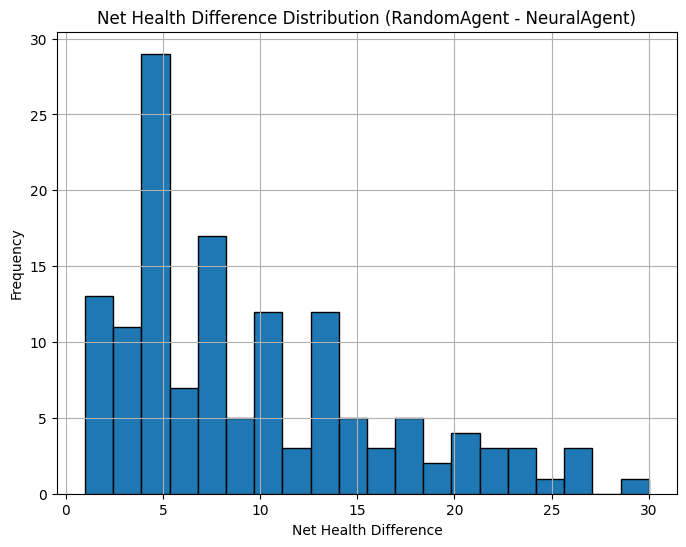

In [27]:
import matplotlib.pyplot as plt

# Identify player names from stats
first_name, second_name = list(episodes[0][1].player_stats.keys())

# Compute net health difference for each episode
diffs = []
for experiences, stats, winner in episodes:
    if winner == second_name:
        continue
    ps = stats.player_stats
    net1 = ps[first_name].authority_gained - ps[second_name].damage_dealt
    net2 = ps[second_name].authority_gained - ps[first_name].damage_dealt
    diffs.append(net1 - net2)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(diffs, bins=20, edgecolor='black')
plt.title(f'Net Health Difference Distribution ({first_name} - {second_name})')
plt.xlabel('Net Health Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Damage Dealt Distribution
Compute the total damage dealt by each player across all episodes and plot its distribution.

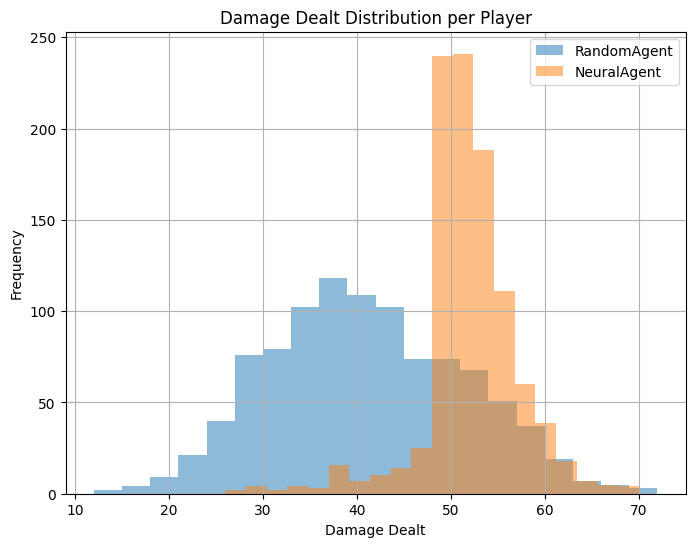

In [28]:
# Aggregate damage dealt per player
damage_data = {first_name: [], second_name: []}
for _, stats, _ in episodes:
    for name in [first_name, second_name]:
        damage_data[name].append(stats.player_stats[name].damage_dealt)

# Plot damage dealt distributions
plt.figure(figsize=(8, 6))
plt.hist(damage_data[first_name], bins=20, alpha=0.5, label=first_name)
plt.hist(damage_data[second_name], bins=20, alpha=0.5, label=second_name)
plt.title('Damage Dealt Distribution per Player')
plt.xlabel('Damage Dealt')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Authority Gained Distribution
Compute the total authority gained by each player across all episodes and plot its distribution.

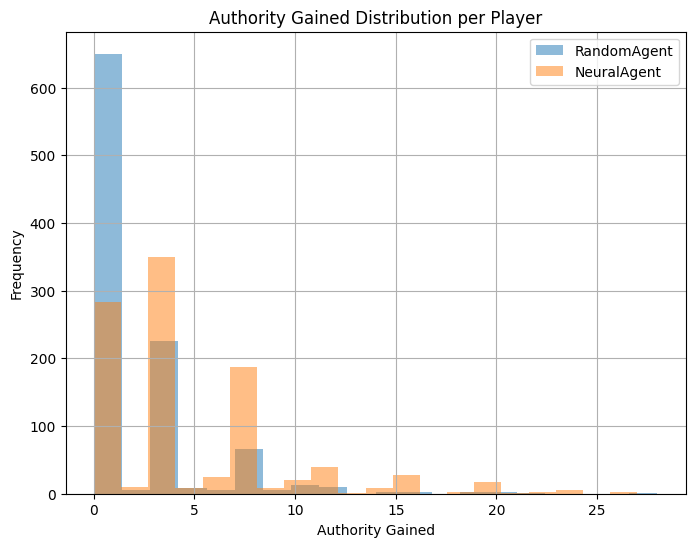

In [29]:
# Aggregate authority gained per player
auth_data = {first_name: [], second_name: []}
for _, stats, _ in episodes:
    for name in [first_name, second_name]:
        auth_data[name].append(stats.player_stats[name].authority_gained)

# Plot authority gained distributions
plt.figure(figsize=(8, 6))
plt.hist(auth_data[first_name], bins=20, alpha=0.5, label=first_name)
plt.hist(auth_data[second_name], bins=20, alpha=0.5, label=second_name)
plt.title('Authority Gained Distribution per Player')
plt.xlabel('Authority Gained')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

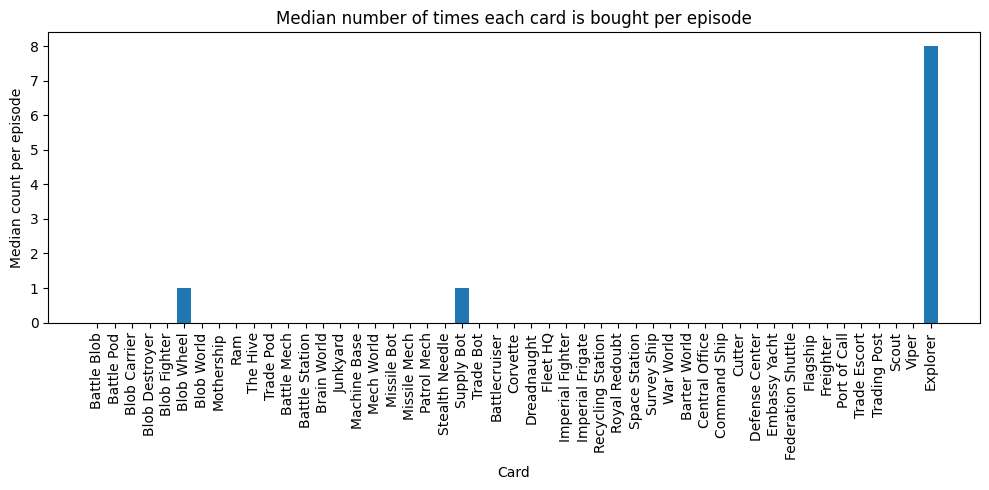

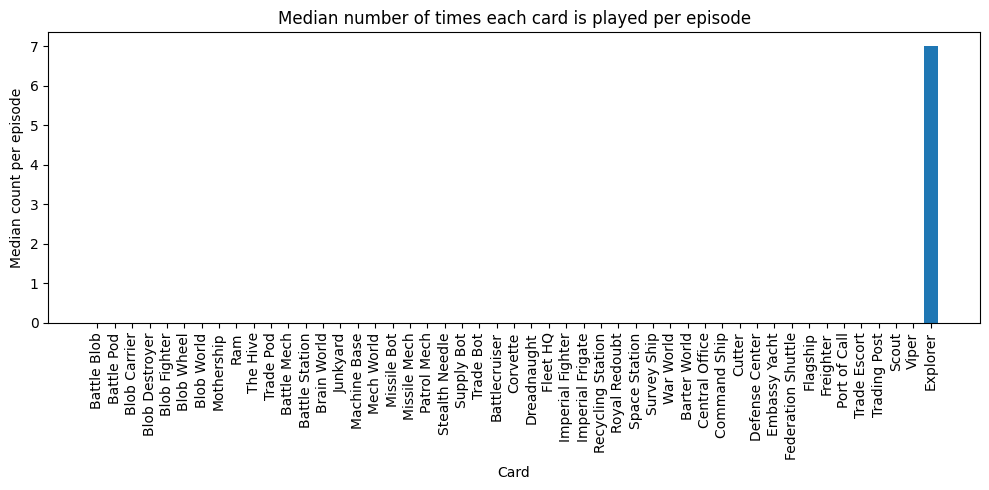

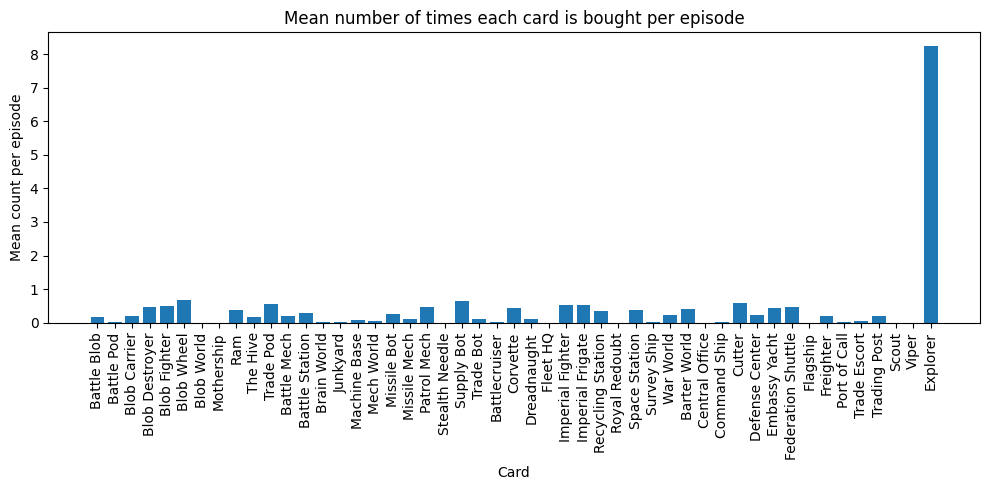

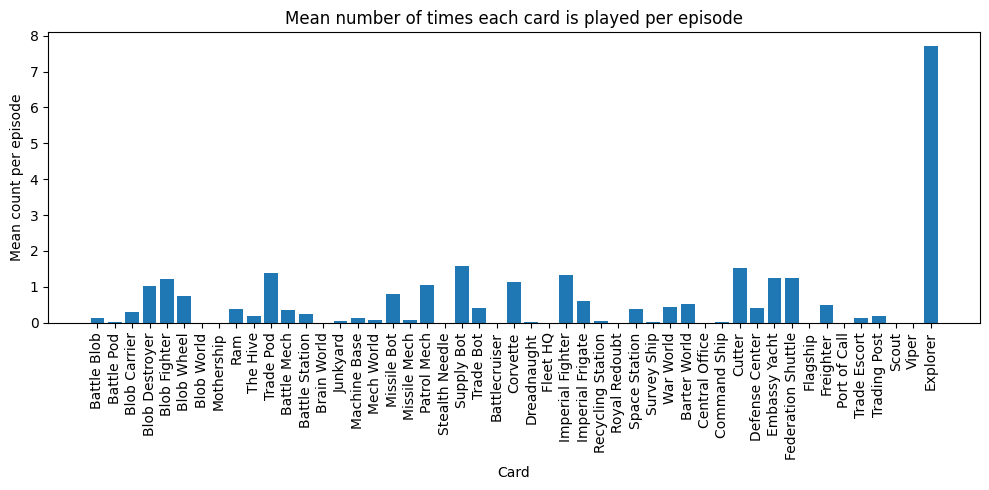

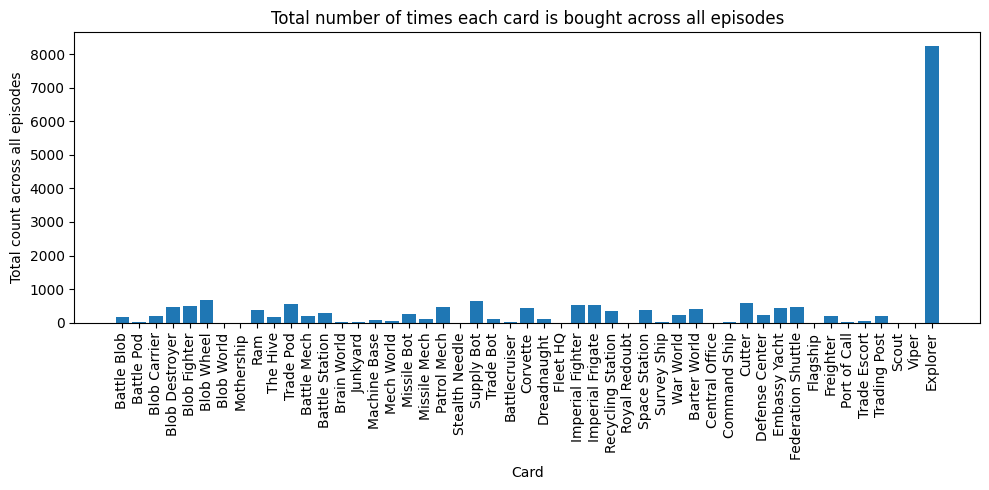

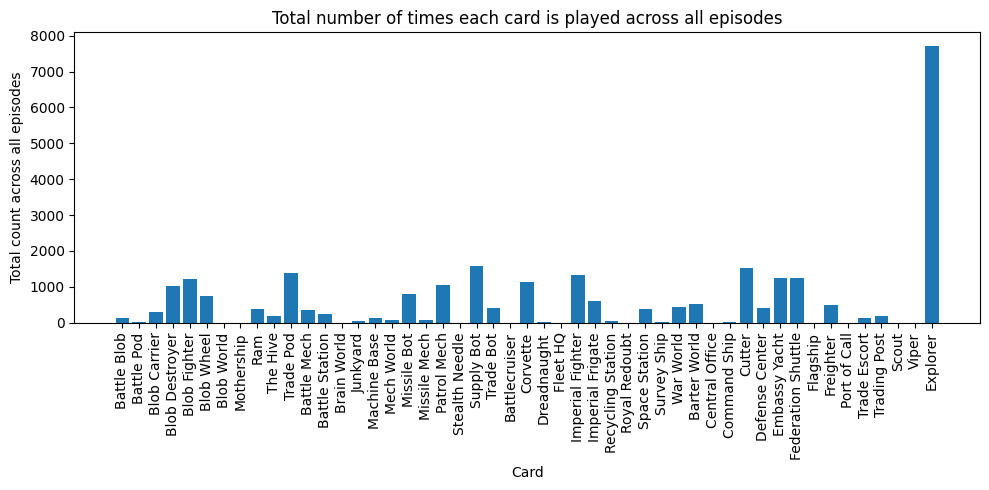

In [30]:
from collections import Counter
import matplotlib.pyplot as plt
from statistics import median, mean
from src.cards.loader import load_trade_deck_cards

# Load and prepare card names
cards = [card.name for card in load_trade_deck_cards(file_path='../data/cards.csv', log_cards=False)]
cards = list(dict.fromkeys(cards)) + ['Scout', 'Viper', 'Explorer']
cards_length = len(cards)

# Define index ranges based on encoding scheme
start_play = 3
end_play = start_play + cards_length
start_buy = end_play
end_buy = start_buy + cards_length

all_episodes = [exp_list for exp_list, _, _ in episodes]

# Compute buy/play counts for each episode
buy_counts_per_ep = []
play_counts_per_ep = []
for episode in all_episodes:
    bc, pc = Counter(), Counter()
    for exp in episode:
        idx = exp.action
        if start_buy <= idx < end_buy:
            ci = idx - start_buy
            if 0 <= ci < cards_length:
                bc[cards[ci]] += 1
        elif start_play <= idx < end_play:
            ci = idx - start_play
            if 0 <= ci < cards_length:
                pc[cards[ci]] += 1
    # Exclude scout and viper plays
    for c in ['Scout', 'Viper']:
        pc.pop(c, None)
    buy_counts_per_ep.append(bc)
    play_counts_per_ep.append(pc)

# Calculate median counts per card across episodes
ep_labels = cards
buy_medians = [median(bc.get(c, 0) for bc in buy_counts_per_ep) for c in ep_labels]
play_medians = [median(pc.get(c, 0) for pc in play_counts_per_ep) for c in ep_labels]

# Calculate mean counts per card across episodes
buy_means = [mean(bc.get(c, 0) for bc in buy_counts_per_ep) for c in ep_labels]
play_means = [mean(pc.get(c, 0) for pc in play_counts_per_ep) for c in ep_labels]

# Plot median buys per card
plt.figure(figsize=(10, 5))
plt.bar(ep_labels, buy_medians)
plt.title("Median number of times each card is bought per episode")
plt.xlabel("Card")
plt.ylabel("Median count per episode")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot median plays per card
plt.figure(figsize=(10, 5))
plt.bar(ep_labels, play_medians)
plt.title("Median number of times each card is played per episode")
plt.xlabel("Card")
plt.ylabel("Median count per episode")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot mean buys per card
plt.figure(figsize=(10, 5))
plt.bar(ep_labels, buy_means)
plt.title("Mean number of times each card is bought per episode")
plt.xlabel("Card")
plt.ylabel("Mean count per episode")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot mean plays per card
plt.figure(figsize=(10, 5))
plt.bar(ep_labels, play_means)
plt.title("Mean number of times each card is played per episode")
plt.xlabel("Card")
plt.ylabel("Mean count per episode")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot total buys per card
plt.figure(figsize=(10, 5))
plt.bar(ep_labels, [sum(bc.get(c, 0) for bc in buy_counts_per_ep) for c in ep_labels])
plt.title("Total number of times each card is bought across all episodes")
plt.xlabel("Card")
plt.ylabel("Total count across all episodes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot total plays per card
plt.figure(figsize=(10, 5))
plt.bar(ep_labels, [sum(pc.get(c, 0) for pc in play_counts_per_ep) for c in ep_labels])
plt.title("Total number of times each card is played across all episodes")
plt.xlabel("Card")
plt.ylabel("Total count across all episodes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()